In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from matplotlib_inline import backend_inline
import seaborn as sns

backend_inline.set_matplotlib_formats('svg')
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv(r'data/Demo3/iris.data', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

X, y = data.loc[:, ['sepal length', 'sepal width', 'petal length', 'petal width']], data.iloc[:, 4]

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_
labels

d:\Miniconda\envs\PyTorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

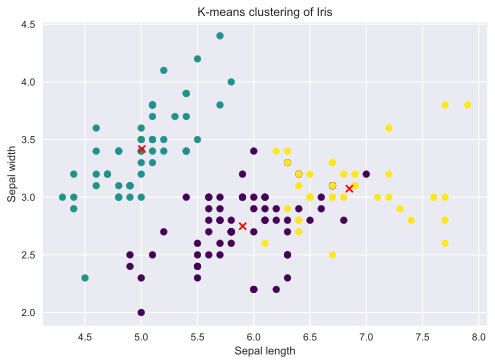

In [4]:
centers = kmeans.cluster_centers_

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('K-means clustering of Iris')
plt.show()

d:\Miniconda\envs\PyTorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Miniconda\envs\PyTorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Miniconda\envs\PyTorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Miniconda\envs\PyTorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Miniconda\envs\PyTorch\lib\site-packages\sklearn\

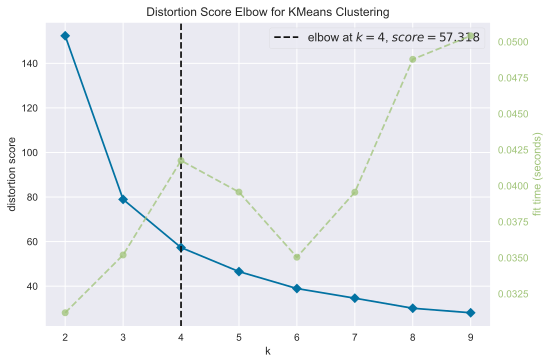

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
kmeans = KMeans(random_state=42)

elbow_visualizer = KElbowVisualizer(kmeans, k=(2, 10))
elbow_visualizer.fit(X)
elbow_visualizer.show()

d:\Miniconda\envs\PyTorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


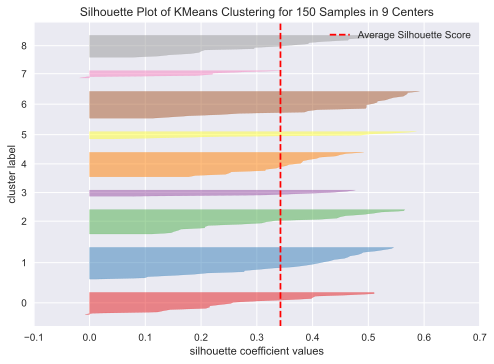

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [6]:
silhouette_visualizer = SilhouetteVisualizer(kmeans)
silhouette_visualizer.fit(X)
silhouette_visualizer.show()

d:\Miniconda\envs\PyTorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
d:\Miniconda\envs\PyTorch\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


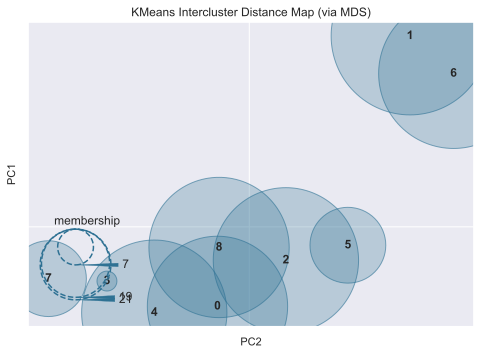

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [7]:
intercluster_visualizer = InterclusterDistance(kmeans)
intercluster_visualizer.fit(X)
intercluster_visualizer.show()

In [8]:
import torch
from torch import nn
from torch.autograd import Variable

class KMeans(nn.Module):
    def __init__(self, n_clusters, n_features):
        super(KMeans, self).__init__()
        self.n_clusters = n_clusters
        self.n_features = n_features
        self.centroids = nn.Parameter(torch.randn(n_clusters, n_features))

    def forward(self, x):
        # 计算每个样本到质心的距离
        distances = torch.cdist(x, self.centroids)

        # 找到每个样本最近的质心
        _, labels = torch.min(distances, dim=1)

        return labels

    def update_centroids(self, x, labels):
        centroids = torch.zeros_like(self.centroids)
        counts = torch.zeros(self.n_clusters)

        for i in range(len(x)):
            centroids[labels[i]] += x[i]
            counts[labels[i]] += 1

        for i in range(self.n_clusters):
            if counts[i] > 0:
                centroids[i] /= counts[i]

        self.centroids.data = centroids

In [ ]:
x = torch.from_numpy(X.astype(np.float32).to_numpy())
kmeans = KMeans(n_clusters=3, n_features=4)

n_epochs = 10000
for epoch in range(n_epochs):
    labels = kmeans(x)
    kmeans.update_centroids(x, labels)

labels = kmeans(x)
centroids = kmeans.centroids.data

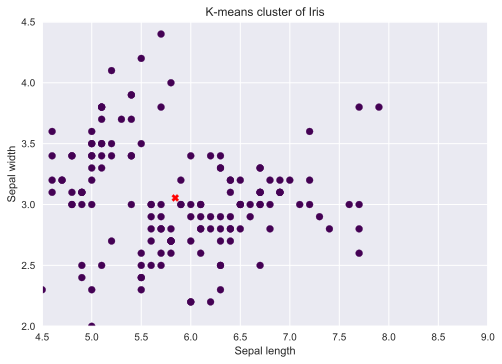

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(4.5, 9)
plt.ylim(2.0, 4.5)
plt.title('K-means cluster of Iris')
plt.show()